## Unsupervised Learning on Country Data - Reynaldi

In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plot


from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from scipy.stats import zscore

In [513]:
data = pd.read_csv("Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [514]:
meta_data = pd.read_csv("data-dictionary.csv")
meta_data

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


Preprocessing 1 : Check NaN

In [515]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Preprocessing 2 : Check Object and Do Encoding

In [516]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [517]:
LABEL_ENCODER = LabelEncoder()

In [518]:
data["country"] = LABEL_ENCODER.fit_transform(data["country"])

Preprocessing 3 : Check Outlier -> No Need Deletion

In [519]:
outlier = data[(np.abs(zscore(data))>3).any(axis = 1)]

outlier

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,23,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
66,66,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
82,82,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,91,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,98,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
112,112,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348
113,113,130.0,25.3,5.07,17.4,5150,104.000,60.5,5.84,2330
114,114,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,123,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
132,132,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399


Preprocessing 4 : Train Test Split and Standard Scaler

In [520]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [521]:
train_data = data.iloc[:,1:]

In [522]:
SCALER = RobustScaler()

In [523]:
scaled_train_data_raw = SCALER.fit_transform(train_data)

In [524]:
PCA_MODEL = PCA(n_components=2)

In [525]:
scaled_train_data = PCA_MODEL.fit_transform(scaled_train_data_raw)

In [526]:
scaled_train_data

array([[-2.29455931e+00, -7.53647921e-02],
       [-2.74219649e-01, -6.85631098e-01],
       [-7.16440516e-01,  7.81059579e-01],
       [-2.05968854e+00,  1.42445365e+00],
       [ 6.30217657e-01, -7.81486030e-01],
       [-4.53014399e-01,  1.48034077e+00],
       [-7.21541617e-01, -3.18605767e-01],
       [ 3.01014874e+00,  7.26967696e-01],
       [ 3.34708098e+00,  1.82596851e-01],
       [-4.75704546e-01,  6.25728586e-01],
       [ 1.39404326e+00, -4.38690902e-01],
       [ 1.58169341e+00,  3.40299059e-01],
       [-1.41248131e+00, -1.42573460e-01],
       [ 7.39274649e-01, -8.04660568e-01],
       [-8.96221170e-02,  2.55145115e-01],
       [ 3.45935663e+00, -9.52614397e-02],
       [-1.64692232e-01, -1.08013979e+00],
       [-1.96629446e+00, -7.19135409e-01],
       [-5.97447475e-01, -7.74433483e-01],
       [-1.01775866e+00, -9.18854357e-02],
       [ 9.84997370e-02, -1.17017849e+00],
       [-7.65046022e-01, -1.80584051e-01],
       [-2.61409707e-01,  2.56094115e-01],
       [ 2.

Because of Many Outliers -> we use KMeans or AgglomerativeCluster

1. Use KMeans

In [527]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [528]:
MODEL = KMeans(max_iter = 500, random_state = 10)

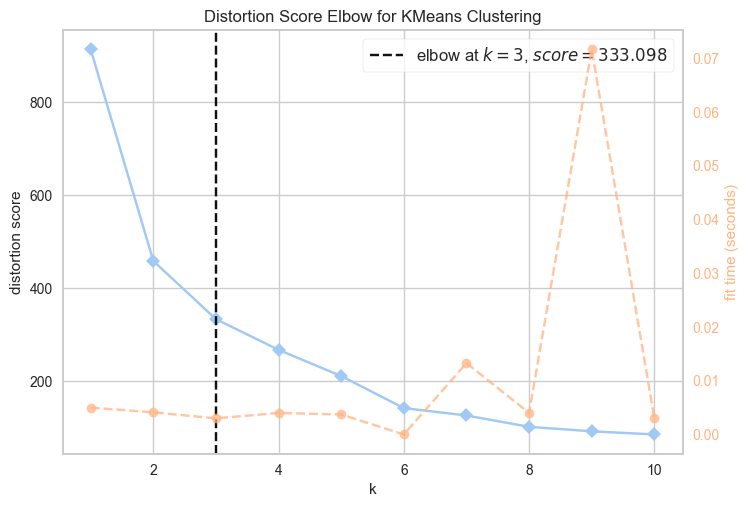

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [529]:
elbow_visualizer = KElbowVisualizer(estimator= MODEL, k = (1,11))
elbow_visualizer.fit(scaled_train_data)
elbow_visualizer.show()

In [530]:
MODEL = KMeans(n_clusters = 3,max_iter = 500, random_state = 10)

In [531]:
prediction = MODEL.fit_predict(scaled_train_data)

In [532]:
result_data = data

In [533]:
def func(x) : 
    return LABEL_ENCODER.classes_[x]

In [534]:
result_data['country'] = result_data["country"].apply(func)

In [535]:
result_data["Class"] = prediction

In [536]:
grouping_hasil = result_data.groupby(by = "Class")[result_data.columns[1:-1]].agg("mean")

In [537]:
grouping_hasil

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Class,,,,,,,,,
0,5.087097,60.351613,8.780000,51.570968,48529.032258,2.988194,80.364516,1.808387,45867.741935
1,78.196667,28.044983,5.713333,36.176098,5331.716667,14.038583,62.688333,4.421333,2413.466667
2,20.284211,43.573684,6.884737,53.439474,13669.210526,4.797592,72.765789,2.249605,7872.447368


In [538]:
# scaled_train_data
# prediction

In [539]:
plot.scatter(x = scaled_train_data[:,0], y = scaled_train_data[:,1], color = prediction, labels = {"x":"Fiture X", "Y" : "Fiture Y"}, title = "PCA Plotting")

In [540]:
grouping_hasil.sort_values(by = ["gdpp","child_mort"], ascending = [False, True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Class,,,,,,,,,
0,5.087097,60.351613,8.780000,51.570968,48529.032258,2.988194,80.364516,1.808387,45867.741935
2,20.284211,43.573684,6.884737,53.439474,13669.210526,4.797592,72.765789,2.249605,7872.447368
1,78.196667,28.044983,5.713333,36.176098,5331.716667,14.038583,62.688333,4.421333,2413.466667


In [550]:
country_class_best = result_data.loc[result_data["Class"] == 0,"country"].to_list()
country_class_best

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Qatar',
 'Singapore',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [551]:
country_class_second = result_data.loc[result_data["Class"] == 2,"country"].to_list()
country_class_second

['Albania',
 'Antigua and Barbuda',
 'Armenia',
 'Bahamas',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'Jamaica',
 'Jordan',
 'Kiribati',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Namibia',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'South Korea',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Thailand',
 'Tonga',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 '

In [553]:
country_class_third = result_data.loc[result_data["Class"] == 1,"country"].to_list()
country_class_third

['Afghanistan',
 'Algeria',
 'Angola',
 'Argentina',
 'Azerbaijan',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kazakhstan',
 'Kenya',
 'Lao',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Uzbekistan',
 'Venezuela',
 'Yemen',
 'Zambia']

In [549]:
plot.scatter(x=result_data["child_mort"],y=result_data["income"],color=result_data["Class"])

## CALCULATION METRICS

In [546]:
from sklearn.metrics import silhouette_score

In [548]:
score = silhouette_score(X = scaled_train_data, labels = prediction)
print(f"Score of Silhouette is : {score}")

Score of Silhouette is : 0.4026725545654397


# Cluster Analysis Summary (Countries Included)

## Class 0 (High Income & Low Child Mortality)

- **Child Mortality:** Very low (≈5.1 per 1,000 children)  
- **Income & GDP per Capita:** High (≈48,500 and 45,900 respectively)  
- **Health Spending:** Highest among all clusters (≈8.78% of GDP)  
- **Life Expectancy:** Long (≈80.4 years)  
- **Fertility Rate:** Low (≈1.81 children per woman)  
- **Trade Activity:** Moderate exports (≈60.4) and imports (≈51.6)  

**Interpretation:** These countries are developed, with strong economies, advanced healthcare, low child mortality, and low population growth.

---

## Class 2 (Medium Income & Moderate Child Mortality)

- **Child Mortality:** Moderate (≈20.3 per 1,000 children)  
- **Income & GDP per Capita:** Moderate (≈13,670 and 7,872 respectively)  
- **Health Spending:** Moderate (≈6.88%)  
- **Life Expectancy:** ≈72.8 years  
- **Fertility Rate:** Moderate (≈2.25 children per woman)  
- **Trade Activity:** Moderate exports (≈43.6) and imports (≈53.4)  

**Interpretation:** These countries are developing or transitioning, showing improving health and economic conditions but not yet at high-income levels.

---

## Class 1 (Low Income & High Child Mortality)

- **Child Mortality:** Very high (≈78.2 per 1,000 children)  
- **Income & GDP per Capita:** Low (≈5,332 and 2,413 respectively)  
- **Health Spending:** Lowest among clusters (≈5.71%)  
- **Life Expectancy:** Short (≈62.7 years)  
- **Fertility Rate:** High (≈4.42 children per woman)  
- **Trade Activity:** Low exports (≈28.0) and imports (≈36.2)  

**Interpretation:** These countries are generally low-income or underdeveloped, with poor health outcomes, high fertility rates, and limited economic development.


# Country Clusters

| Class | Description                           | Countries (sample / full list) |
|-------|---------------------------------------|--------------------------------|
| 0     | High Income & Low Child Mortality     | Australia, Austria, Bahrain, Belgium, Brunei, Canada, Cyprus, Denmark, Finland, France, Germany, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Luxembourg, Malta, Netherlands, New Zealand, Norway, Qatar, Singapore, Slovenia, Spain, Sweden, Switzerland, UAE, United Kingdom, United States |
| 2     | Medium Income & Moderate Child Mortality | Albania, Antigua and Barbuda, Armenia, Bahamas, Barbados, Belarus, Belize, Bhutan, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Czech Republic, Dominican Republic, Ecuador, El Salvador, Estonia, Fiji, Georgia, Greece, Grenada, Guatemala, Guyana, Hungary, Jamaica, Jordan, Kiribati, Kyrgyz Republic, Latvia, Lebanon, Lesotho, Libya, Lithuania, Macedonia, Malaysia, Maldives, Mauritius, Micronesia, Moldova, Montenegro, Morocco, Namibia, Oman, Panama, Paraguay, Peru, Philippines, Poland, Portugal, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Slovak Republic, Solomon Islands, South Korea, St. Vincent and the Grenadines, Suriname, Thailand, Tonga, Tunisia, Turkey, Turkmenistan, Ukraine, Uruguay, Vanuatu, Vietnam |
| 1     | Low Income & High Child Mortality     | Afghanistan, Algeria, Angola, Argentina, Azerbaijan, Bangladesh, Benin, Bolivia, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo (Dem. Rep.), Congo (Rep.), Côte d'Ivoire, Egypt, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, India, Indonesia, Iran, Iraq, Kazakhstan, Kenya, Lao, Liberia, Madagascar, Malawi, Mali, Mauritania, Mongolia, Mozambique, Myanmar, Nepal, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sri Lanka, Sudan, Tajikistan, Tanzania, Timor-Leste, Togo, Uganda, Uzbekistan, Venezuela, Yemen, Zambia |
